- LogisticRegression ROC-AUC SCORE:0.6514
- DecisionTreeClassifier ROC-AUC SCORE:  0.6788
- KNeighborsClassifier ROC-AUC SCORE:  0.5348
- VotingClassifier ROC-AUC SCORE:  0.7180
- RandomForestClassifier ROC-AUC SCORE:  0.8571
- AdaBoostClassifier ROC-AUC SCORE:  0.6767
- GradientBoostingClassifier ROC-AUC SCORE:  0.8622

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
churn = pd.read_csv('data/churn_ver02.csv')
np.random.seed(123)
target = churn.Exited
churn = churn.drop(columns='Exited')
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(churn, target, test_size=0.3,
                                                   stratify=target)

- XGBoost

In [4]:
!pip3 install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 5.1 MB/s eta 0:00:0000:0100:01


In [5]:
import xgboost as XGB # Native XGB
from xgboost import XGBClassifier # Sklearn-Wrapper
from xgboost import XGBRegressor 

In [27]:
xgb = XGBClassifier(n_estimators=300, objective='binary:logistic',
                    learning_rate=0.01, max_depth=6)
evals = [(x_test, y_test)]

In [30]:
xgb.fit(x_train, y_train, eval_metric='auc', eval_set=evals,
        early_stopping_rounds=100, verbose=True)

[0]	validation_0-auc:0.84548
[1]	validation_0-auc:0.84571
[2]	validation_0-auc:0.84587
[3]	validation_0-auc:0.84616
[4]	validation_0-auc:0.84611
[5]	validation_0-auc:0.84921
[6]	validation_0-auc:0.84984
[7]	validation_0-auc:0.84990
[8]	validation_0-auc:0.84984
[9]	validation_0-auc:0.84968
[10]	validation_0-auc:0.84973
[11]	validation_0-auc:0.84967
[12]	validation_0-auc:0.84974
[13]	validation_0-auc:0.84950
[14]	validation_0-auc:0.84802
[15]	validation_0-auc:0.84930
[16]	validation_0-auc:0.84816
[17]	validation_0-auc:0.84887
[18]	validation_0-auc:0.84845
[19]	validation_0-auc:0.84885
[20]	validation_0-auc:0.84852
[21]	validation_0-auc:0.84896
[22]	validation_0-auc:0.84895
[23]	validation_0-auc:0.84898
[24]	validation_0-auc:0.84898
[25]	validation_0-auc:0.84883
[26]	validation_0-auc:0.84891
[27]	validation_0-auc:0.84909
[28]	validation_0-auc:0.84902
[29]	validation_0-auc:0.84917
[30]	validation_0-auc:0.84917
[31]	validation_0-auc:0.84923
[32]	validation_0-auc:0.84931
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [31]:
pred = xgb.predict_proba(x_test)[:,1]
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred)

0.8553106539177449

In [22]:
xgb.feature_importances_

array([0.04637681, 0.06089721, 0.15602596, 0.04205977, 0.06277969,
       0.34215134, 0.04021   , 0.20031066, 0.04918856], dtype=float32)

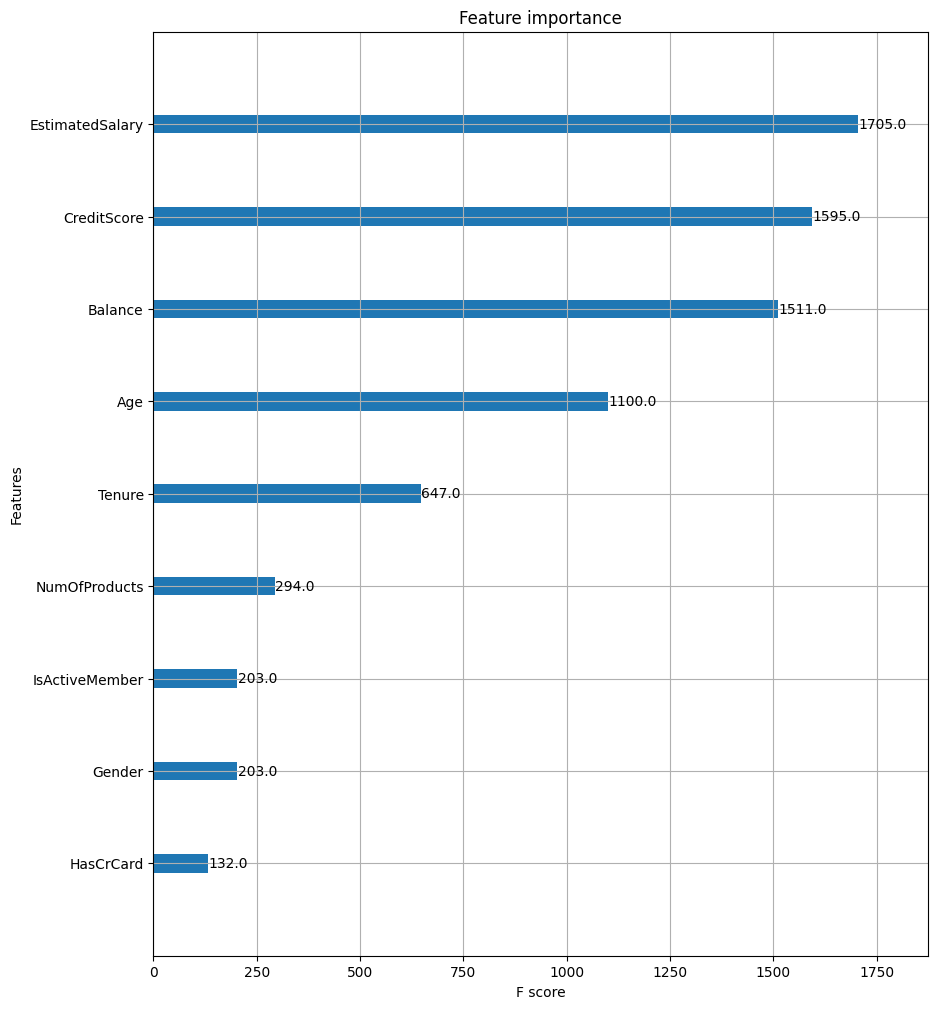

In [23]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb, ax=ax);

- LGBM

In [33]:
!pip3 install lightgbm

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.0 MB/s eta 0:00:00:00:0100:01


In [34]:
from lightgbm import LGBMClassifier # Wrapper-Class
from lightgbm import LGBMRegressor

In [42]:
lgbm = LGBMClassifier(n_estimators=300, objective='binary',
                      learning_rate=0.1, max_depth=8)
lgbm.fit(x_train, y_train, eval_metric='auc', eval_set=evals,
        early_stopping_rounds=100, verbose=True)

/home/hwi/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/hwi/.local/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.835543	valid_0's binary_logloss: 0.473504
[2]	valid_0's auc: 0.843721	valid_0's binary_logloss: 0.451172
[3]	valid_0's auc: 0.845975	valid_0's binary_logloss: 0.433541
[4]	valid_0's auc: 0.848559	valid_0's binary_logloss: 0.419683
[5]	valid_0's auc: 0.847577	valid_0's binary_logloss: 0.408739
[6]	valid_0's auc: 0.850182	valid_0's binary_logloss: 0.39898
[7]	valid_0's auc: 0.849925	valid_0's binary_logloss: 0.391279
[8]	valid_0's auc: 0.851725	valid_0's binary_logloss: 0.384483
[9]	valid_0's auc: 0.852526	valid_0's binary_logloss: 0.378761
[10]	valid_0's auc: 0.853291	valid_0's binary_logloss: 0.374177
[11]	valid_0's auc: 0.852543	valid_0's binary_logloss: 0.370481
[12]	valid_0's auc: 0.853208	valid_0's binary_logloss: 0.367122
[13]	valid_0's auc: 0.854002	valid_0's binary_logloss: 0.363685
[14]	valid_0's auc: 0.853152	valid_0's binary_logloss: 0.361619
[15]	valid_0's auc: 0.852958	valid_0's binary_logloss: 0.359392
[16]	valid_0's auc: 0.853137	valid_0's binary_logl

LGBMClassifier(max_depth=8, n_estimators=300, objective='binary')

In [43]:
pred = lgbm.predict_proba(x_test)[:,1]
roc_auc_score(y_test,pred)

0.8558799571686652

In [37]:
lgbm.feature_importances_

array([ 91,  44, 141,  38, 180, 116,   4,  46,  90], dtype=int32)

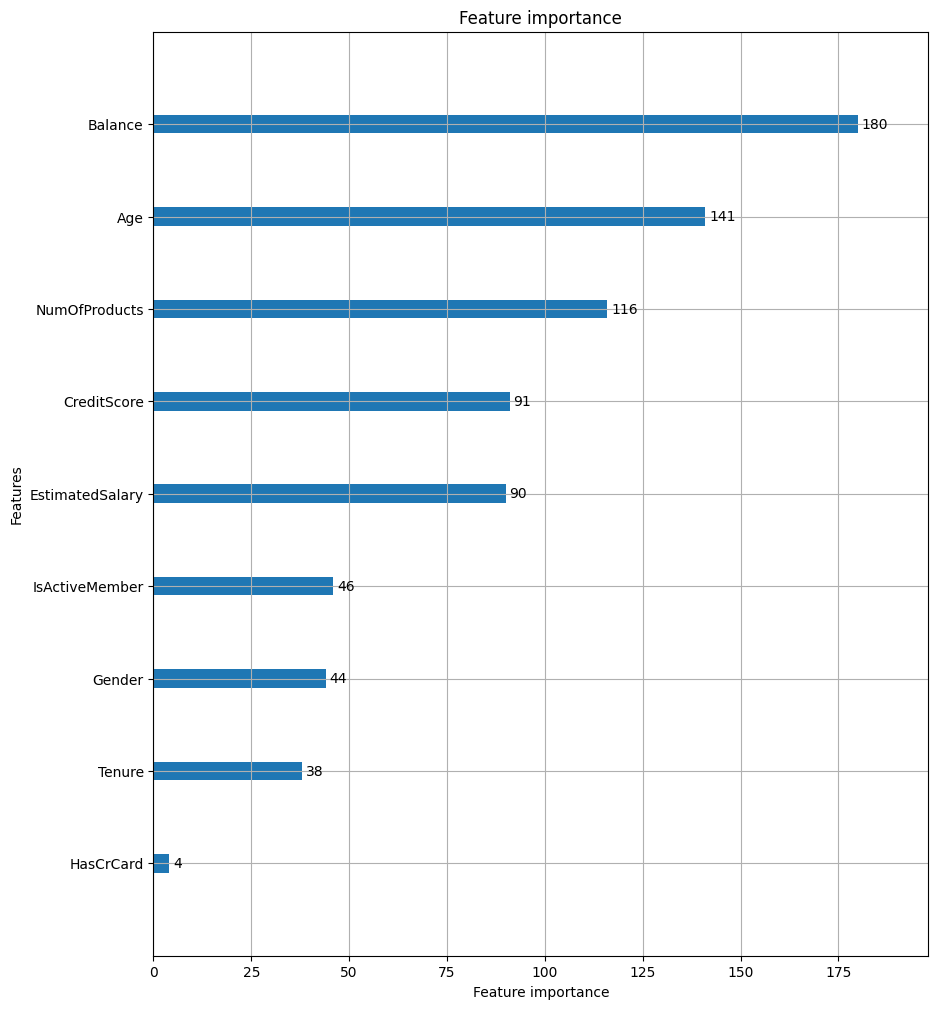

In [38]:
from lightgbm import plot_importance
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm, ax=ax);